In [5]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [6]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [7]:
base = pd.read_csv(path_base('db_preco_casas.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_preco_casas.csv


In [8]:
base.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062


In [5]:
base.shape

(21613, 21)

In [12]:
X = base.iloc[:,5].values
print(X)

[1180 2570  770 ... 1020 1600 1020]


In [13]:
y = base.iloc[:,2].values
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [14]:
correlacao = np.corrcoef(X,y)

In [15]:
print(correlacao)

[[1.         0.70203505]
 [0.70203505 1.        ]]


In [16]:
X = X.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,
                                                                 y,
                                                                 test_size = 0.3,
                                                                 random_state=0)

In [21]:
print(X_treinamento.shape)
print(X_teste.shape)
print(y_treinamento.shape)
print(y_teste.shape)

(15129, 1)
(6484, 1)
(15129,)
(6484,)


In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [35]:
regressor.fit(X_treinamento,y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# b0
regressor.intercept_

-37893.59850106668

In [37]:
# b1
regressor.coef_

array([278.32860644])

# Score

In [42]:
score = regressor.score(X_treinamento,y_treinamento)
score

0.49453356717789787

# plotar

In [26]:
import matplotlib.pyplot as plt

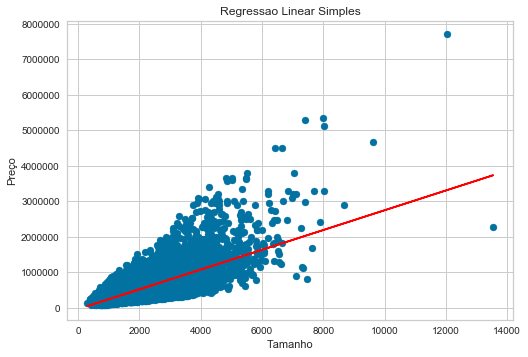

In [51]:
plt.scatter(X_treinamento,y_treinamento)
plt.title('Regressao Linear Simples - Treinamento')
plt.xlabel('Tamanho')
plt.ylabel('Preço')
plt.plot(X_treinamento,regressor.predict(X_treinamento),color='red')

In [43]:
previsoes = regressor.predict(X_teste)

In [44]:
resultado  = abs(y_teste-previsoes)

In [45]:
print(resultado)

[ 63116.30871034 316099.00641905 199200.40522524 ... 180512.90534826
 106032.73903242 123500.16200177]


In [46]:
resultado.mean()

172604.1288999541

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
mae = mean_absolute_error(y_teste,previsoes)
mae

172604.1288999541

In [50]:
mse = mean_squared_error(y_teste,previsoes)
mse

70170013932.11592

# base teste

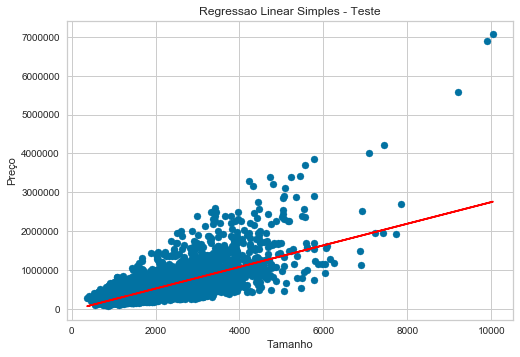

In [52]:
plt.scatter(X_teste,y_teste)
plt.title('Regressao Linear Simples - Teste')
plt.xlabel('Tamanho')
plt.ylabel('Preço')
plt.plot(X_teste,regressor.predict(X_teste),color='red')

In [53]:
score = regressor.score(X_teste,y_teste)
score

0.48889929019453016